In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

/var/folders/hq/h1l0m2k168z1jyy80mldd6rw0000gn/T/ipykernel_3006/94824415.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hq/h1l0m2k168z1jyy80mldd6rw0000gn/T/ipykernel_3006/94824415.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy'],
      dtype='object')
XGBoost Accuracy: 0.8333333333333334
Regression Accuracy score:
 0.8333333333333334
Classification_report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
 

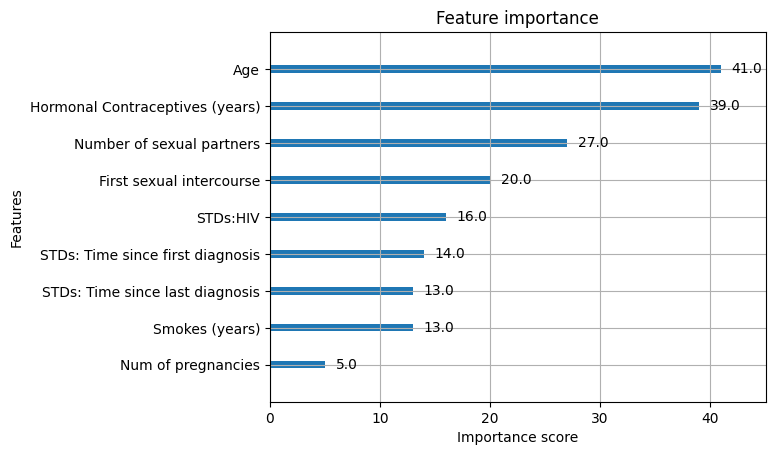

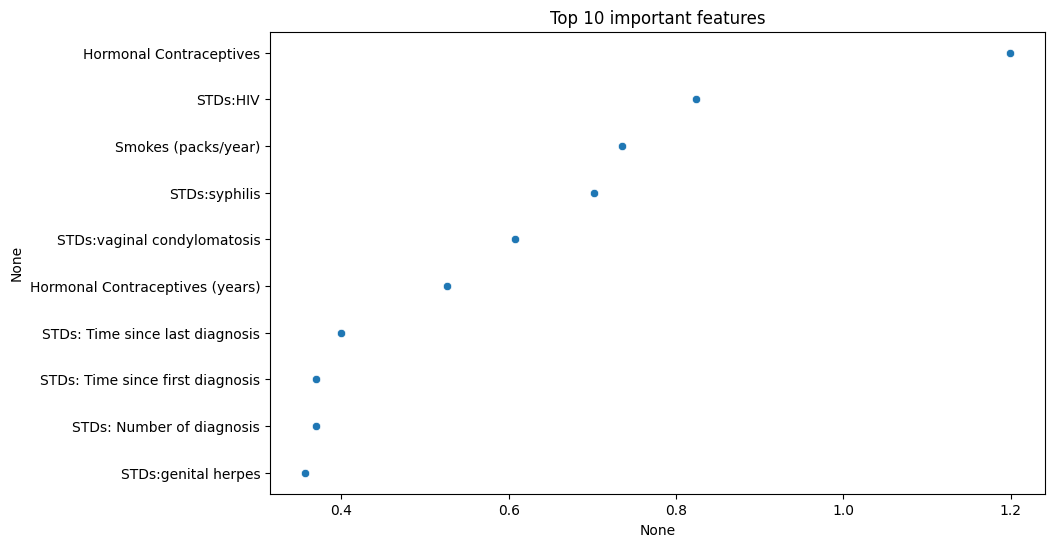

In [15]:
df=pd.read_csv("/Users/swastikanaskar/Desktop/risk_factors_cervical_cancer.csv")
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')  
df.dropna(inplace=True)
df.head()
df.fillna(0,inplace=True)
df.drop({'Hinselmann','Schiller','Citology'},axis=1,inplace=True)
print(df.columns)
X=df.drop('Biopsy',axis=1)
y=df['Biopsy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
print("XGBoost Accuracy:",accuracy_score(y_test,xgb_pred))
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Regression Accuracy score:\n", accuracy_score(y_test, y_pred))
print("Classification_report:\n", classification_report(y_test,y_pred))
print("Confusion_matrix:\n", confusion_matrix(y_test,y_pred))
xgb.plot_importance(xgb_model,max_num_features=10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=importance[:10], y=importance[:10].index, palette="spring")
plt.title("Top 10 important features")
plt.show()











/var/folders/hq/h1l0m2k168z1jyy80mldd6rw0000gn/T/ipykernel_3006/2372391023.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[:10], y=importance[:10].index, palette="spring")


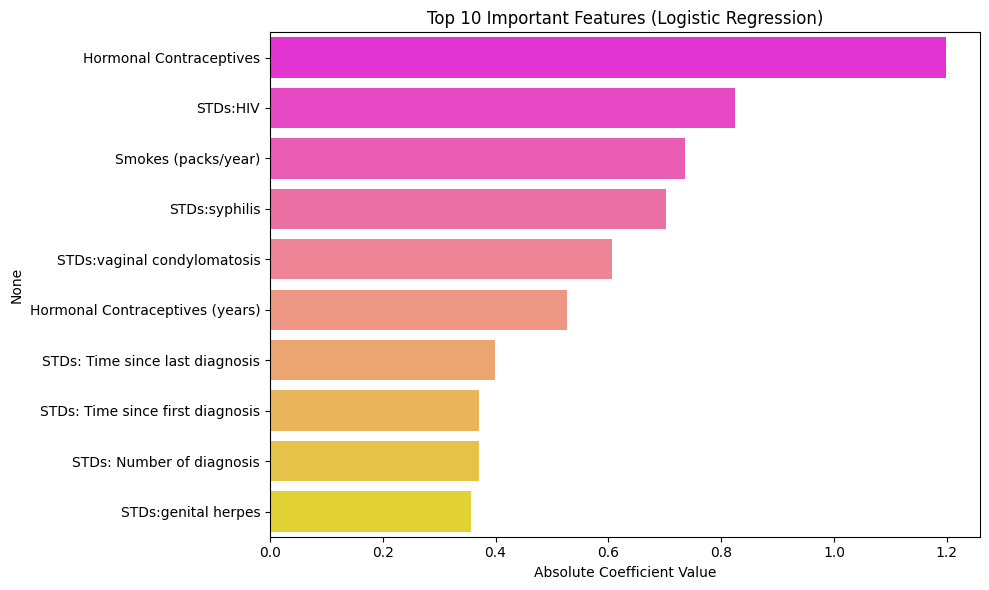

In [14]:
importance = pd.Series(log_model.coef_[0], index=X.columns)
importance = importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance[:10], y=importance[:10].index, palette="spring")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

/var/folders/hq/h1l0m2k168z1jyy80mldd6rw0000gn/T/ipykernel_3006/956511346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=importance[:10], y=importance[:10].index, palette="spring")


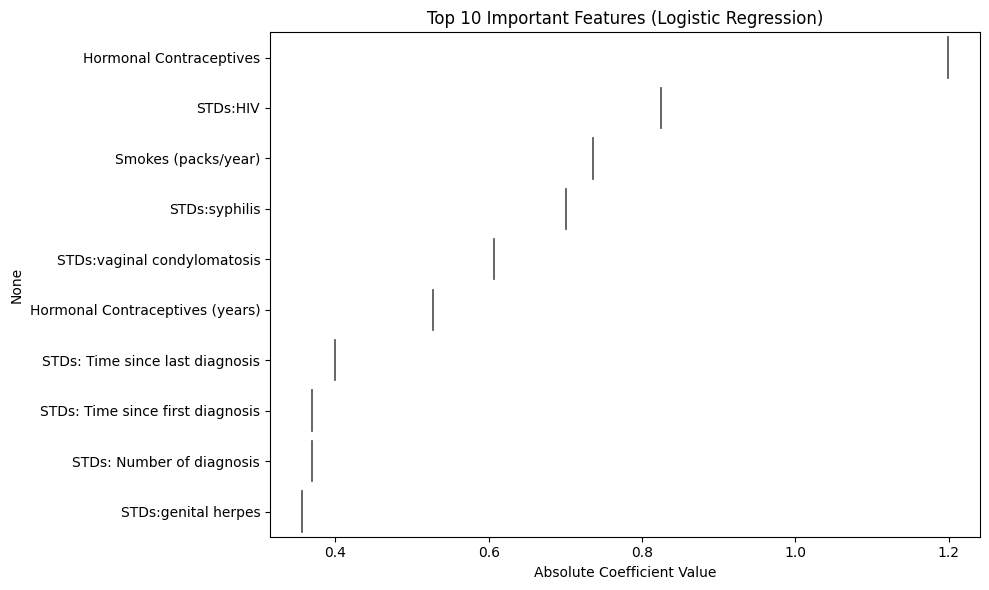

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=importance[:10], y=importance[:10].index, palette="spring")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()